#### This notebook is for testing the functions in `little_things_lib.galaxy_model` that generates a 2D velocity field given a rotation curve and the galaxy geometry parameters (inclination, position angle of rings, x & y center pixels)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# this part tells python where to find the little things code
import os
import sys

root_repo_dir = os.path.split(os.getcwd())[0]
sys.path.append(root_repo_dir)

from little_things_lib.galaxy_model import GalaxyModel

### The cells below give an example of how the 2D velocity field gets generated. 



In [7]:
# ignore this function, it is just for generated a test rotation curve
# will not be used for actual galaxies
def scale_point_mass_v(radii, v_at_first_radius):
    v_rot = [v_at_first_radius]
    r0 = radii[0]
    for r in radii[1:]:
        v_rot.append(v_at_first_radius * (1.*r0/r)**(1/4.))
    return v_rot

You will have to look up some of the quantities below in the FITS file (open in SAO DS9). Fill in the appropriate values below.

In [8]:
 
galaxy_model = GalaxyModel(
    distance_to_galaxy=3000,  # [kpc] Look this up for the galaxy 
    deg_per_pixel=4.17e-4,  # 'CRDELT1' and 'CRDELT2' in the FITS file header (use absolute value)
    image_xdim=500,
    image_ydim=500,
    galaxy_name='test_galaxy'
)


Look up the systemic velocity for the galaxy. The other values should be from the Bbarolo fits. 


- `n_radii` should be the number of rings used in the BBarolo fit. Try to use at least 50 (if it runs ok with that many). It assumes the radii are in units of kpc.
- for inclination and position angle, just input the average value for all the ring fits
- `x_center`, `y_center` are the **galaxy's** center coordinates

In [33]:
# change this to the radii array that is output from the Bbarolo fits.
radii = np.linspace(5, 200, 200)*galaxy_model.kpc_per_pixel

v_systemic = 30
avg_inclination = 45. # deg
avg_pos_angle = 45.
x_center = 250
y_center=250

In [34]:
n_radii = len(radii)

tilted_ring_params = {
    'v_systemic': v_systemic,
    'radii': radii,   
    'inclination': [avg_inclination for i in range(n_radii)],
    'position_angle': [avg_pos_angle for i in range(n_radii)],
    'x_pix_center': [x_center for i in range(n_radii)],
    'y_pix_center': [y_center for i in range(n_radii)]
}
galaxy_model.set_tilted_ring_parameters(**tilted_ring_params)


#### Replace the parameter `v_rot` with the array of rotation velocites from BBarolo that correspond to the radii.

In [39]:

# the commented out part is for the test galaxy only
# when you test on an actual galaxy, use the rotation curve fit from BBarolo
"""
test_rotation_curve = scale_point_mass_v(
    np.array(tilted_ring_params['radii']) * galaxy_model.kpc_per_pixel,
    v_at_first_radius = 90.    
)
"""

rotation_curve = [ fill this in with the BBarolo velocities ]
test_2d_velocity_field = galaxy_model.create_2d_velocity_field(
    tilted_ring_params['radii'], 
    v_rot = rotation_curve  
)

This plots the simulated 2D velocity field. Check this output against the model output velocity field from BBarolo to make sure that the following look similar between the two.
- position angle (angle of tilt from the vertical)
- inclination (aspect ratio of the ellipse)
- velocities

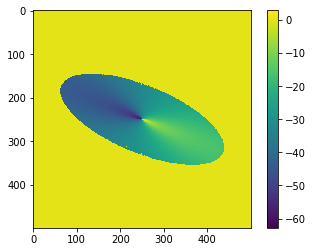

In [36]:
plt.imshow(test_2d_velocity_field)
plt.colorbar()